In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

# определим функцию построения боксплота
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

#определим функцию выполнения теста Стьюдента
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
        else:
            print('Не найдены статистически значимые различия для колонки', column)
            break

column_for_drop = list() # переменная, в которую будем записывать наименования колонок,
                         # подлежащих удалению из модели
            
# читаем данные из датасета
stud = pd.read_csv('stud_math.csv')

# проводим первичный анализ
display(stud.head (10))
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В датасете 30 столбцов, из которых 13 числовых, 17 - строковых. 
Столбец score - целевой
Количество строк - 395, при этом полностью заполненными (non-null) являются только три столбца: school, sex, age.  
Целевой столбец score содержит 6 неопределенных значений, данные строки целесообразно удалить из набора, так как они будут лишними в последующем обучении модели.
После удаления получаем 389 строк в датасете

In [93]:
stud = stud[stud.score.notnull()] # удаляем строки, содержащие неопределенные значения score

In [94]:
stud.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Разброс значений целевого показателя от 0 до 100 представляется логичным: возможны ученики, получившие 100 баллов, равно как и те, кто не набирает ни одного балла


## Начинаем последовательно рассматривать все столбцы

# school

Строковый столбец. Рассмотрим статистические параметры его влияния на целевой показатель,
а также выполним тест Стьюдента

,school
GP,344
MS,45


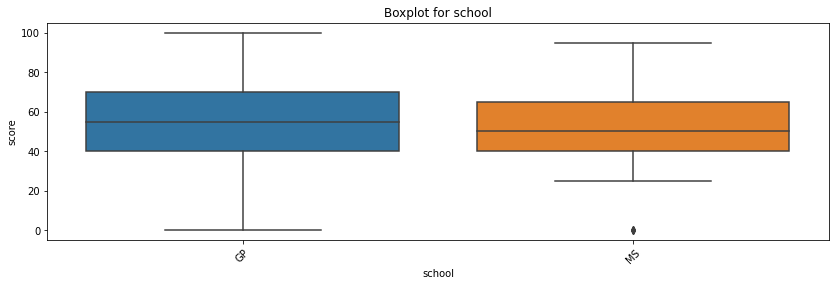

In [95]:
display (pd.DataFrame (stud.school.value_counts()))
get_boxplot('school')

In [96]:
get_stat_dif('school')

Не найдены статистически значимые различия для колонки school


Очевидно, что параметр school не оказывает сколько-нибудь существенного влияния на целевой параметр. Занесем
данный столбец в список "столбцов на удаление":

In [97]:
column_for_drop.append ('school')

# sex

Строковый столбец. Не имеет неопределенных значений. Рассмотрим статистические параметры его влияния на целевой показатель,
а также выполним тест Стьюдента

,sex
F,204
M,185


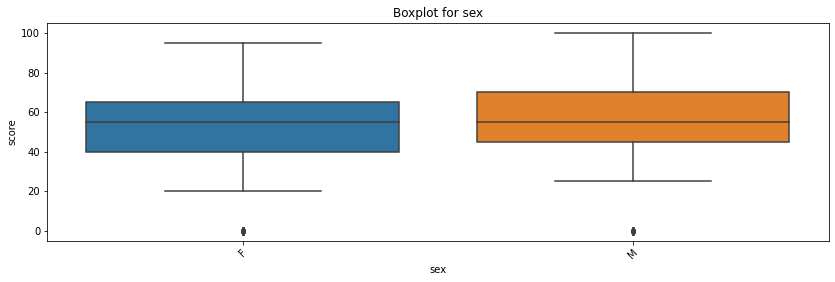

In [98]:
display (pd.DataFrame (stud.sex.value_counts()))
get_boxplot('sex')

In [99]:
get_stat_dif('sex')

Не найдены статистически значимые различия для колонки sex


Столбец sex также, как и school, не оказывает значимого влияния на целевой показатель. В то же время, здравый смысл подсказывает, что данный параметр лучше оставить в модели. Особенно, учитывая, что в датасете есть параметр romantic.
При моделировани может оказаться, что совокупность параметров "sex - romantic" усиливает влияние на целевой параметр.
(Да простят меня феминистки!)

# age

Числовой столбец, построим для него гистограмму

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

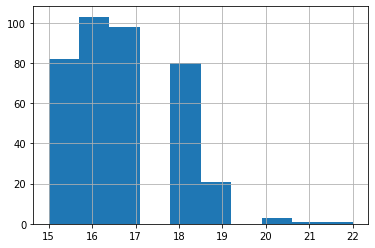

In [100]:
stud.age.hist()
stud.age.describe()

Столбец age не имеет пропусков, но имеет выбросы - возраст учащихся от 19 
до 22 лет. Отметим, что в условии задачи сказано: "..отследить влияние условий жизни учащихся в
возрасте от 15 до 22 лет" Поэтому, данные значения, на самом деле, выбросами не являются. 
Оставляем столбец без изменений.

# address

Строковый столбец. Имеет неопределенные значения. Рассмотрим статистические параметры его влияния на целевой показатель, а также выполним тест Стьюдента

,address
U,291
R,83


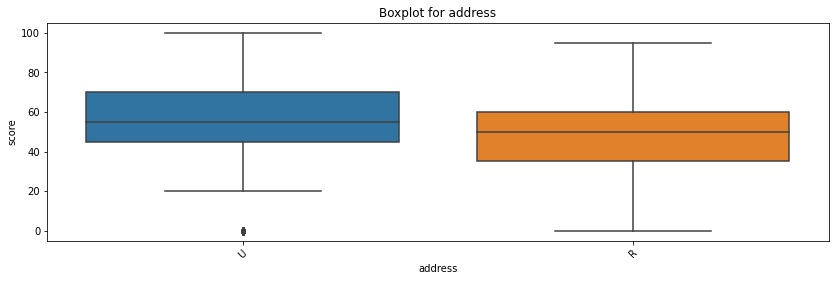

In [101]:
display (pd.DataFrame (stud.address.value_counts()))
get_boxplot('address')

In [102]:
get_stat_dif ('address')

Найдены статистически значимые различия для колонки address


Столбец оказывает влияние на параметры целевого показателя, оставляем
его в модели. Столбец имеет пропуски, однако заполнить его одним из двух
вариантов номинативного признака не представляется возможным. Поэтому просто
заменим пропуски на значение 'unknown'

In [103]:
stud.address = stud.address.fillna('unknown')

# famsize 

Строковый столбец. Имеет неопределенные значения. Рассмотрим статистические параметры его влияния на целевой показатель,
а также выполним тест Стьюдента

,famsize
GT3,255
LE3,107


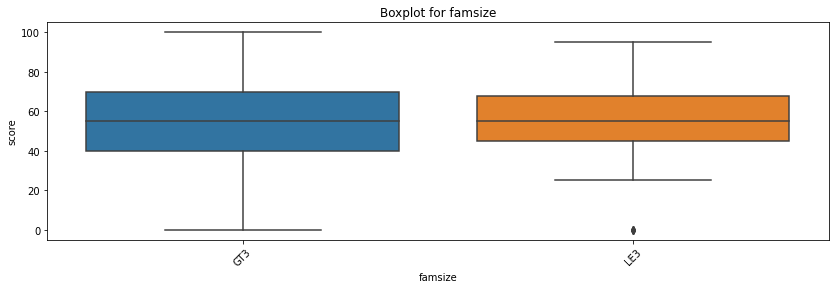

In [104]:
display (pd.DataFrame (stud.famsize.value_counts()))
get_boxplot('famsize')

In [105]:
get_stat_dif ('famsize')

Не найдены статистически значимые различия для колонки famsize


Параметр famsize не оказывает сколько-нибудь существенного влияния на целевой параметр. Занесем
данный столбец в список "столбцов на удаление":


In [106]:
column_for_drop.append ('famsize')

# Pstatus

Строковый столбец. Имеет неопределенные значения. Рассмотрим статистические параметры его влияния на целевой показатель,
а также выполним тест Стьюдента

,Pstatus
T,308
A,36


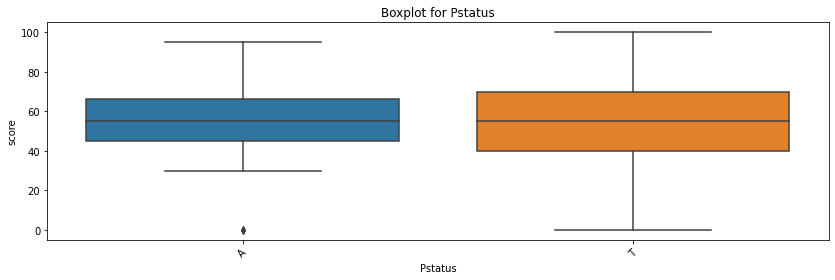

In [107]:
display (pd.DataFrame (stud.Pstatus.value_counts()))
get_boxplot('Pstatus')

In [108]:
get_stat_dif ('Pstatus')

Не найдены статистически значимые различия для колонки Pstatus


Параметр Pstatus не оказывает сколько-нибудь существенного влияния на целевой параметр. Занесем
данный столбец в список "столбцов на удаление":

In [109]:
column_for_drop.append ('Pstatus')

# Medu, Fedu, Mjob, Fjob

рассмотрим группу схожих параметров (Medu, Fedu, Mjob, Fjob). Отметим, что несмотря на то, что Medu, Fedu является числовыми, 
по факту таковыми не является, отражая категориальное деление параметра по определенному признаку (например,образование матери). Поэтому для него применяем те же подходы, что и для оценки влияния номинативных параметров: построение боксплота и тест Стьюдента

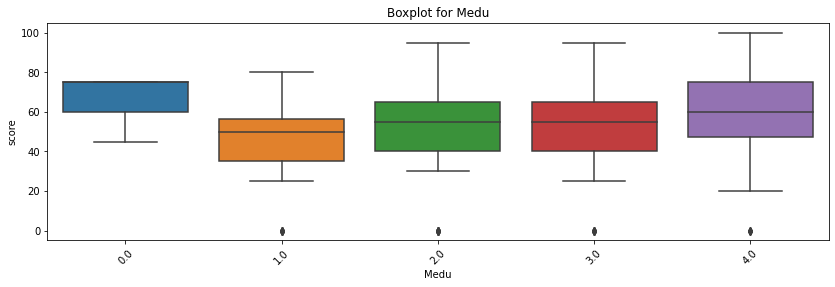

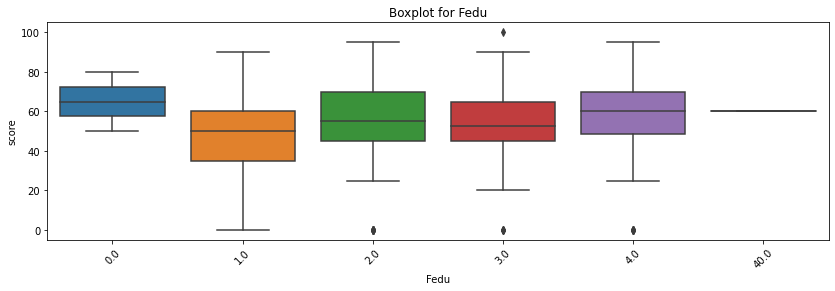

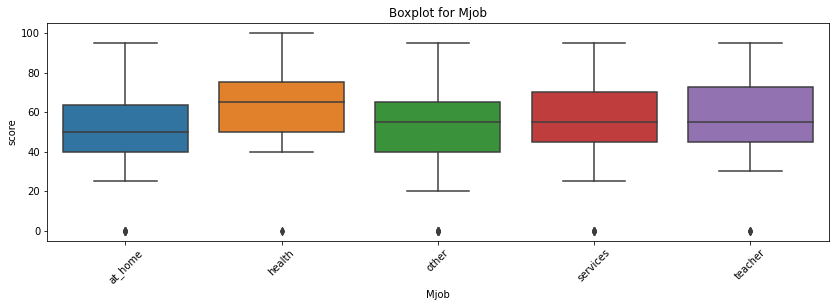

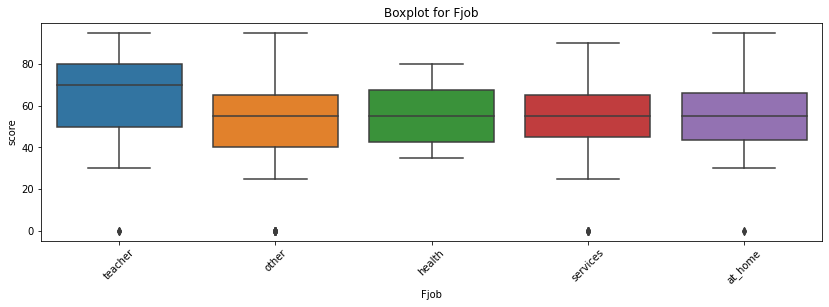

In [110]:
for col in ['Medu', 'Fedu', 'Mjob', 'Fjob']:
    get_boxplot(col)

In [111]:
for col in ['Medu', 'Fedu', 'Mjob', 'Fjob']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Не найдены статистически значимые различия для колонки Fedu
Не найдены статистически значимые различия для колонки Mjob
Не найдены статистически значимые различия для колонки Fjob


Для столбца Medu eже на графике видно, что параметр оказывает влияние на целевой показатель.
Тест Стьюдента это подтверждает.
Параметр содержит небольшое количество пропусков, заменим их на медианное значение параметра (3.0)

In [112]:
stud.Medu = stud.Medu.fillna(stud.Medu.median())

Столбцы Fedu и Mjob, как видно из графиков и теста Стьюдента, не оказывают существенного влияния на целевой показатель.
Занесем их в "сисок на удаление":

In [113]:
column_for_drop.append ('Fedu')
column_for_drop.append ('Mjob')

Столбец Fjob, согласно тесту Стьюдента, также не оказывает влияния на целевой показатель. Однако из графика видно, что учащиеся, имеющие отца с профессией "teacher" имеют более высокие оценки. Поэтому оставляем Fjob в модели.
Поскольку Fjob имеет неопределенные значения - заменим их на 'unknown':

In [114]:
stud.Fjob = stud.Fjob.fillna('unknown')

# reason 

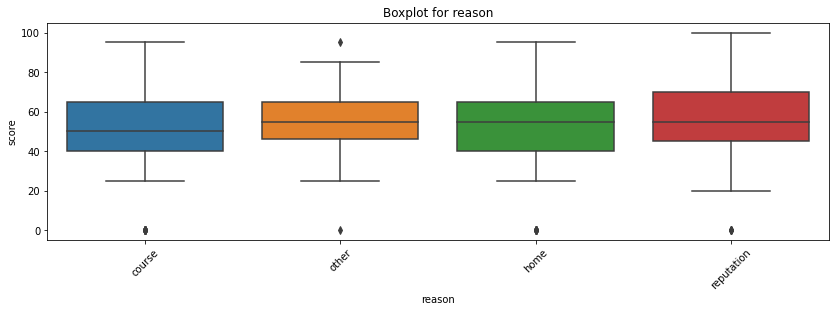

In [115]:
get_boxplot('reason')

In [116]:
get_stat_dif('reason')

Не найдены статистически значимые различия для колонки reason


И график, и тест Стьюдента не выявили серьезного влияния данного параметра на 
целевой показатель. Внесем в "список на удаление":

In [117]:
column_for_drop.append ('reason')

# guardian

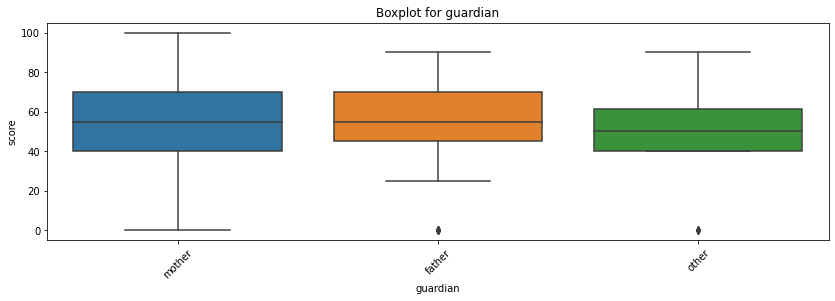

In [118]:
get_boxplot('guardian')

In [119]:
get_stat_dif('guardian')

Не найдены статистически значимые различия для колонки guardian


И график, и тест Стьюдента не выявили серьезного влияния данного параметра на 
целевой показатель. Внесем в "список на удаление":

In [120]:
column_for_drop.append ('guardian')

# traveltime, studytime, failures

Столбцы traveltime, studytime, failures, по сути, является не числовыми, а номинативным. Применим соответствующие методы анализа:

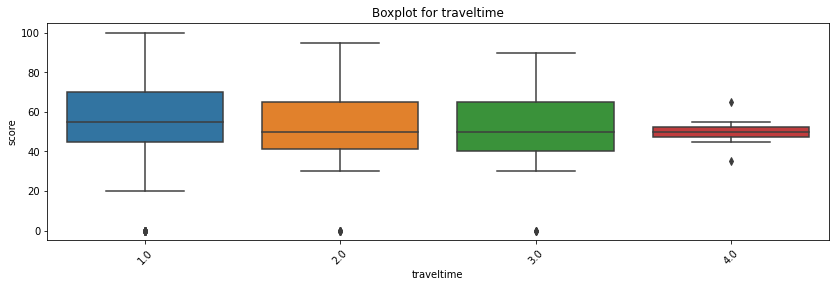

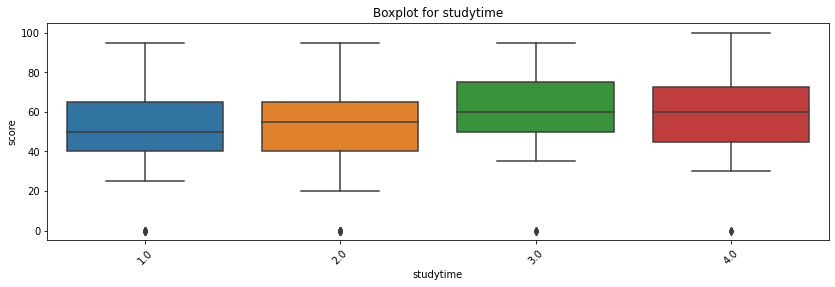

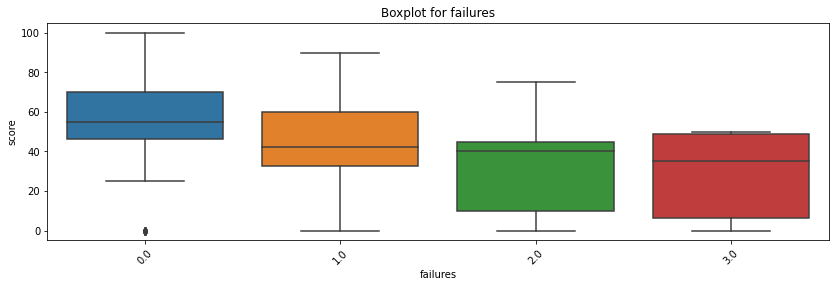

In [121]:
for col in ['traveltime', 'studytime', 'failures']:
    get_boxplot(col)

In [122]:
for col in ['traveltime', 'studytime', 'failures']:
    get_stat_dif(col)

Не найдены статистически значимые различия для колонки traveltime
Не найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures


Из трех рассмотренных параметров, существенное влияние на целевой показатель оказывает только failures. Остальных заносим в кандидаты на удаление:


In [123]:
column_for_drop.append ('traveltime')
column_for_drop.append ('studytime')

In [124]:
display (pd.DataFrame (stud.failures.value_counts()))

,failures
0.0,290
1.0,48
2.0,15
3.0,14


In [125]:
Столбец failures имеет неопределенные значения - заменим их на наиболее часто
встречающееся значение - 0:

SyntaxError: invalid syntax (<ipython-input-125-648791847b6f>, line 1)

In [126]:
stud.failures = stud.failures.fillna(0.0)


# schoolsup, famsup, paid, activities, nursery, higher, internet, romantic]:

Данная группа столбцов однотипна по вариантам значений (yes или no). Проведем анализ сразу для группы данных параметров:

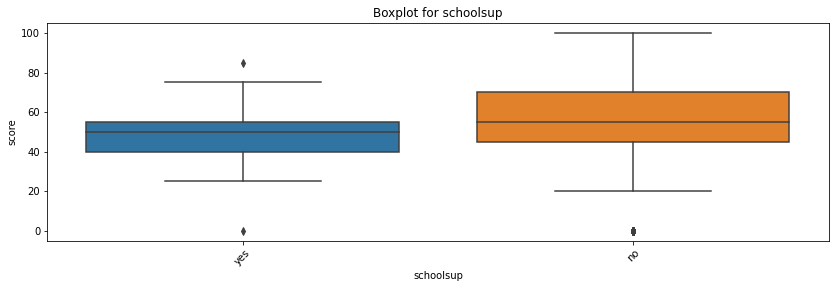

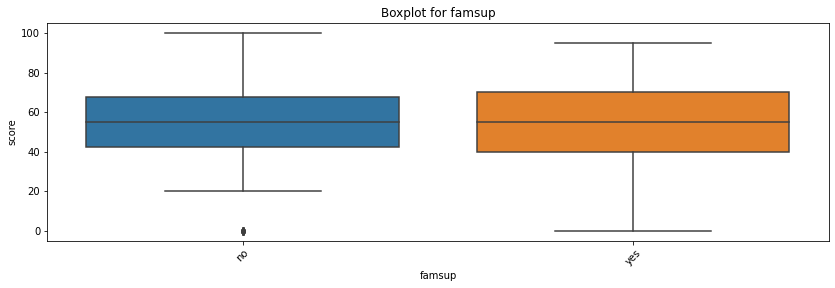

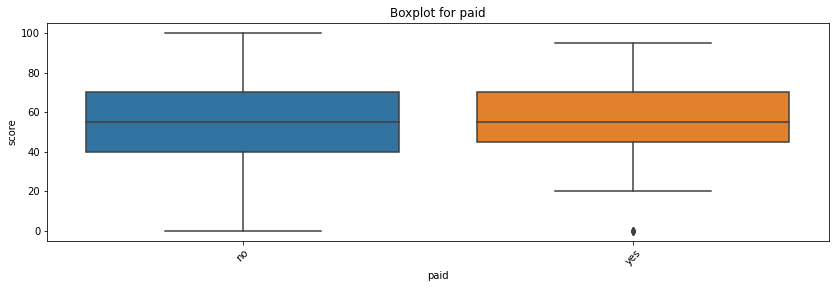

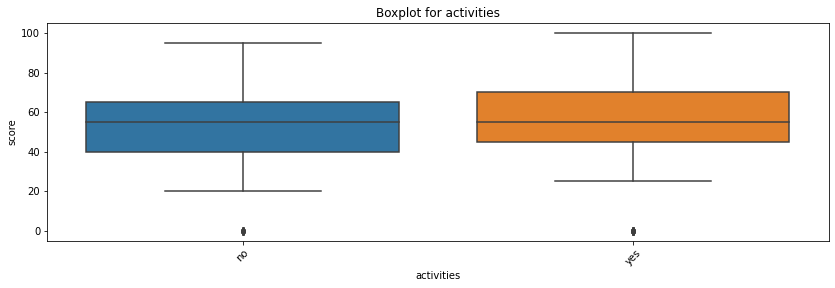

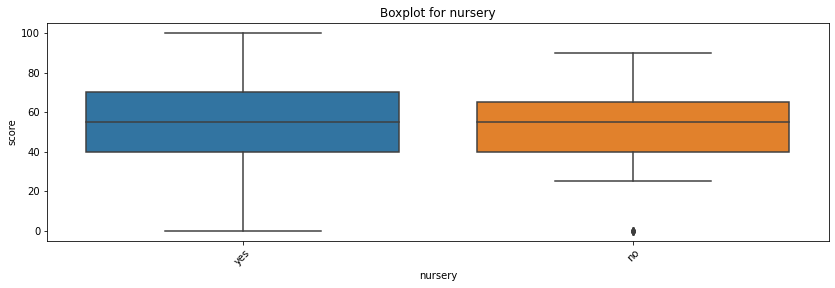

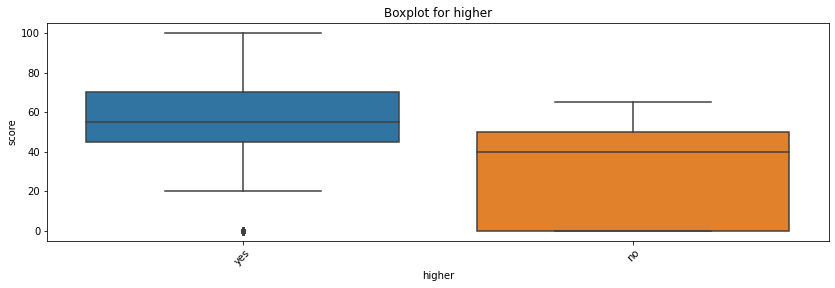

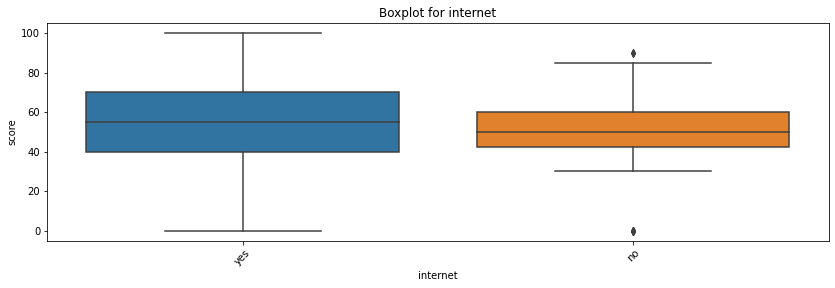

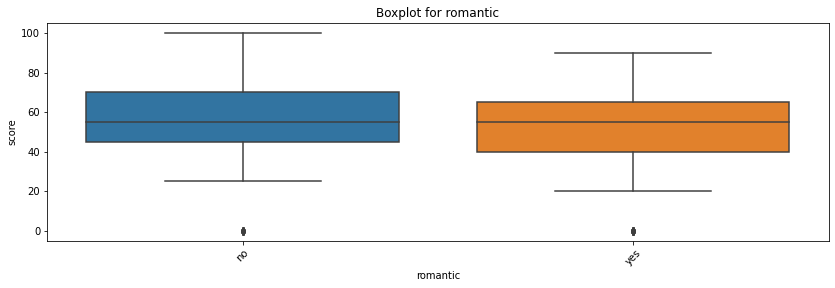

In [127]:
for col in ['schoolsup', 'famsup','paid','activities','nursery','higher','internet','romantic']:
    get_boxplot(col)

In [128]:
for col in ['schoolsup', 'famsup','paid','activities','nursery','higher','internet','romantic']:
    get_stat_dif(col)

Не найдены статистически значимые различия для колонки schoolsup
Не найдены статистически значимые различия для колонки famsup
Не найдены статистически значимые различия для колонки paid
Не найдены статистически значимые различия для колонки activities
Не найдены статистически значимые различия для колонки nursery
Найдены статистически значимые различия для колонки higher
Не найдены статистически значимые различия для колонки internet
Найдены статистически значимые различия для колонки romantic


Графики вкупе с тестом Стьюдента показывают, что влияние на целевой показатель оказывают только два параметра: higher и romantic. Занесем незначимые стобцы в "список на удаление:

In [129]:
for col in ['schoolsup', 'famsup','paid','activities','nursery','internet']:
    column_for_drop.append (col)

Столбцы higher, romantic имеют неопределенные значения:

In [130]:
display (stud.higher.describe())
display (stud.romantic.describe())

count     369
unique      2
top       yes
freq      350
Name: higher, dtype: object

count     358
unique      2
top        no
freq      235
Name: romantic, dtype: object

В higher значение 'yes' встречается 350 раз из 369 (более 90% случаев): поэтому здесь мы заменим неопределенные значения на 'yes'.
В romantic 'no' встречасется лишь в 66% случаев и здесь замена на 'no' не так очевидна. Поэтому в romantic неопределенности заменим на 'unknown'.

In [131]:
stud.higher = stud.higher.fillna ('yes')
stud.romantic = stud.romantic.fillna ('unknown')

# famrel, freetime, goout,  health,

Данная группа столбцов также однотипна, параметры являются не числовыми,
а категориальными (номинативными). Проведем анализ по данной группе параметров: 

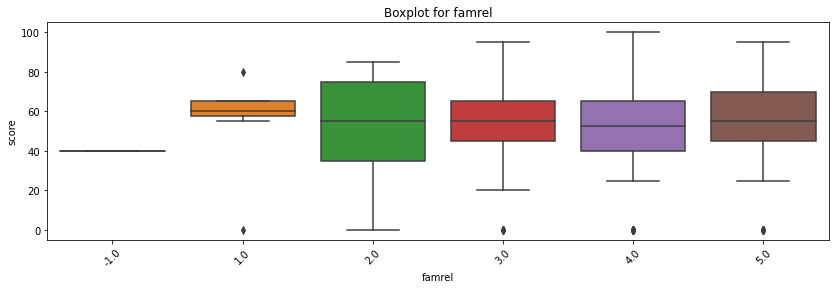

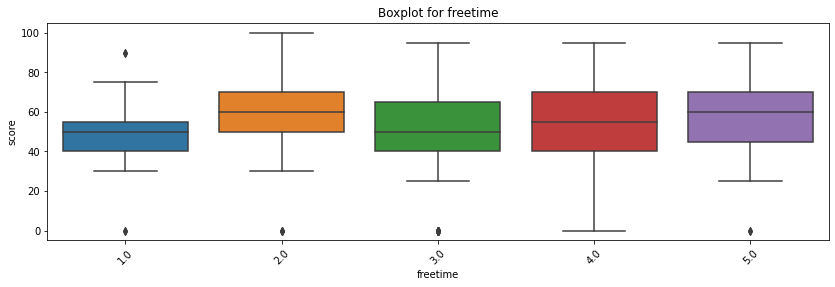

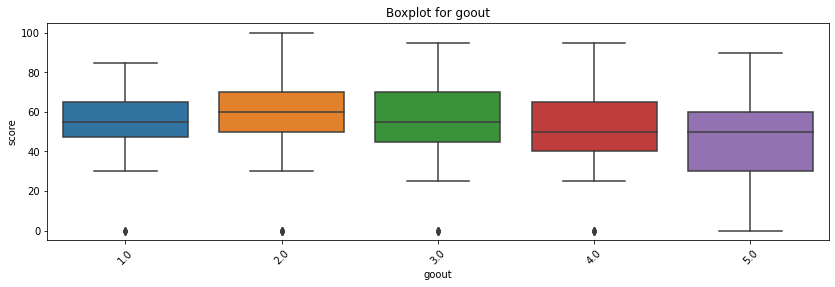

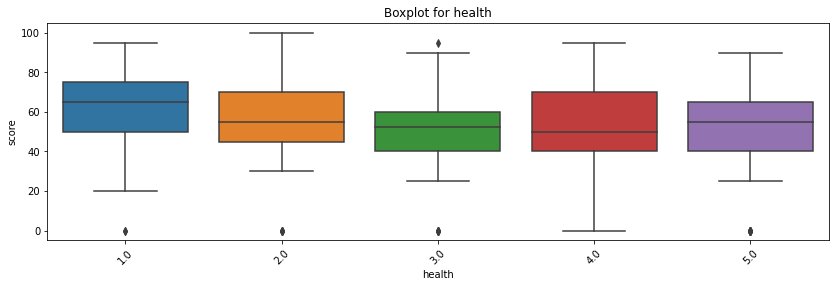

In [132]:
for col in ['famrel', 'freetime', 'goout',  'health']:
    get_boxplot(col)

In [133]:
for col in ['famrel', 'freetime', 'goout',  'health']:
    get_stat_dif(col)

Не найдены статистически значимые различия для колонки famrel
Не найдены статистически значимые различия для колонки freetime
Не найдены статистически значимые различия для колонки goout
Не найдены статистически значимые различия для колонки health


Стат анализ показывает отсутствие существенного влияния даннной группы параметров на целевой показатель. Даже такой важный жизненный показатель, как состояние здоровья, ведет себя "странно": при наихудшем здоровье - максимальное среднее значение оценок. Данный факт говорит, пожалуй, о некачественной оценке состояния здоровья учащихся в датасете.
Тем не менее, вид графика для  freetime и здравый смысл подсказывают, что данный параметр лучше в модели оставить. Остальные столбцы из модели удалим:

In [134]:
for col in ['famrel', 'goout',  'health']:
    column_for_drop.append (col)

In [135]:
stud.freetime.describe()

count    380.000000
mean       3.223684
std        0.993364
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

freetime имеет небольшое количество неопределенных значений в датасете - заменим их на медианное значение (3)

In [136]:
stud.freetime = stud.freetime.fillna (3)

# absences 

Реально числовой параметр

count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

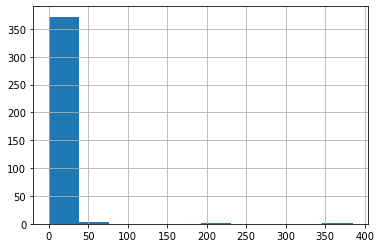

In [137]:
stud.absences.hist()
stud.absences.describe()

Гистограмма показывает, что параметр  absences имеет явные выбросы,
рассмотрим их подробнее:

In [138]:
display (stud.loc[stud['absences']>50])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,54.0,55.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


Значение 385 (при score=85) явно ошибочное. Также, с большой вероятностью ошибочно
и значение 212. Что касается значений от 54 до 75, при невысоких оценках score,
они вполне могут иметь место в реальной жизни. 
Кроме того, absences имеет также порядка 10 неопределенных значений. Учитывая, 
что данный параметр может иметь большое влияние на целевой показатель, удалим
из набора для модели все строки, содержащие выбросы 212 и 385, а также неопределенные значения. 


In [139]:
stud = stud.loc[stud['absences']<200]

# studytime, granular

In [140]:
Данного параметра нет в описании датасета. Тем не менее, постараемся
его рассмотреть. Сначала переименуем, чтобы можно было использовать
в языковых конструкциях, затем посмотрим варианты значений и зависимость от них
целевого показателя:

SyntaxError: invalid syntax (<ipython-input-140-54ba23258d5b>, line 1)

In [141]:
stud.rename(columns={'studytime, granular':'granular'},inplace=True)
display (pd.DataFrame (stud.granular.value_counts()))

,granular
-6.0,183
-3.0,100
-9.0,61
-12.0,27


In [142]:
display (stud[stud.granular == -3].score.describe ())
display (stud[stud.granular == -6].score.describe ())
display (stud[stud.granular == -9].score.describe ())
stud[stud.granular == -12].score.describe ()

count    100.000000
mean      49.950000
std       24.199247
min        0.000000
25%       40.000000
50%       50.000000
75%       65.000000
max       95.000000
Name: score, dtype: float64

count    183.000000
mean      50.218579
std       21.424703
min        0.000000
25%       40.000000
50%       55.000000
75%       65.000000
max       95.000000
Name: score, dtype: float64

count    61.000000
mean     57.622951
std      22.371979
min       0.000000
25%      50.000000
50%      60.000000
75%      75.000000
max      95.000000
Name: score, dtype: float64

count     27.000000
mean      56.296296
std       26.406315
min        0.000000
25%       45.000000
50%       60.000000
75%       72.500000
max      100.000000
Name: score, dtype: float64

Разброс статистических значений целевого параметра в зависимости от 
значений рассматриваемого параметра достаточно невелик. С учетом того,
что природа происхождения параметра неизвестна, его предлагается удалить

In [143]:
column_for_drop.append ('granular')

# Корреляционный анализ

Корреляционный анализ столбцов рассматриваемого датасета проводить не имеет смысла, поскольку реальных числовых
столбца в наборе всео три: age, absences и целевой - score. Здравый смысл подсказывает, что даже если между возрастом 
учащихся и их пропусками занятий обнаружится корреляция - удалять какой либо из двух столбцов из модели
нецелесообразно.

# Заключительное формирование набора параметров для модели

Рассмотрев все столбцы (параметры) датасета, мы пришли к выводу, что целесообразно удалить следующие
столбцы:

In [144]:
column_for_drop

['school',
 'famsize',
 'Pstatus',
 'Fedu',
 'Mjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'internet',
 'famrel',
 'goout',
 'health',
 'granular']

Подумав еще раз, приходим к мысли о целесообразности такого удаления:

In [145]:
for col in column_for_drop:
    stud.drop(col, inplace = True, axis = 1)

# Выводы:

Анализ исходного датасета показал, что из 29 параметров только 3 являются истинно числовыми:
age, absences и score. Остальные столбцы - номинативные. 
Ввиду малого количества истинно числовых столбцов, к тому же имеющих разную "природу",
проведение корреляционного анализа не имеет смысла. Все числовые столбцы включены в модель.
Целевой столбец - score - имеет небольшое количество (6) неопределенных значений - такие строки были 
удалены из набора для модели.
Также были удалены строки с неопределенными значениями столбца absences, в виду предполагаемой важности
данного параметра для модели, а также небольшого числа неопределнных значений.
В итоговом наборе осталось 376 полностью заполненных строк.
Заполнение неопределнных значений номинативных переменных проводилось различными способами:
в наиболее спорных случаях неопреденные значения установлены в 'unknown'. Там, где логика данным позволила,
неопределенные значения заполнялись значениями медианы, либо максимальными значениями.
Решения о включении в модель номинативных столбцов принимались по результатам статистического анализа,
с учетом поправки на мнение аналитика.
Практически все столбцы, по которым стат анализ показал отстутствие влияния на целевой показатель, 
были удалены из модели. Исключения составили: 
- sex: предполагается его влияние на целевой результат вкупе с параметром romantic;
- Fjob: на боксплоте все же видно влияние на целевой показатель, в случае. когда параметр имеет значение teacher;
- freetime: дань мнению эксперта, проводящего анализ.

Таким образов с наборе данных для модели включены 11 стобцов, из которых 3 - числовые. Набор имеет 376 строк,
неопределенных значений нет.
Структура данных набора представлена ниже:


In [146]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 394
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       376 non-null    object 
 1   age       376 non-null    int64  
 2   address   376 non-null    object 
 3   Medu      376 non-null    float64
 4   Fjob      376 non-null    object 
 5   failures  376 non-null    float64
 6   higher    376 non-null    object 
 7   romantic  376 non-null    object 
 8   freetime  376 non-null    float64
 9   absences  376 non-null    float64
 10  score     376 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 35.2+ KB
